# Cours PCD – Labo 4 : ACP sur des images

## Tâches et questions



In [52]:
%matplotlib inline

## Question 1

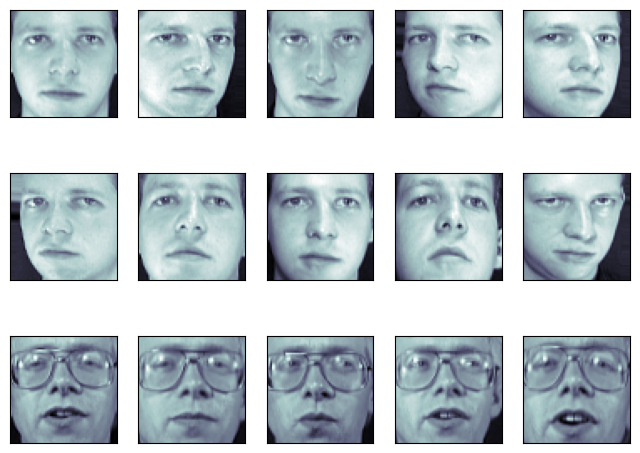

In [53]:
from sklearn import datasets
from matplotlib import pyplot as plt

faces = datasets.fetch_olivetti_faces()
faces.data.shape

fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

### a)
```datasets.fetch_olivetti_faces()``` retourne le dataset "Olivetti Faces". Ce dataset est un ensemble d'images de visages de personnes.

`faces.data` est un tableau de 400 images représentées chacune par un tableau de 64 * 64 pixels. Les images sont en noir et blanc donc les pixels sont représentés par un seule valeur numérique entre 0 et 1.

### b)
Il y a 40 personnes différentes (donc 40 "classes") et 10 images pour chaque personne.

### c)
Comme dit au point *a)*, chaque image est composée de 64*64 (4096) pixels représentés chacun par un nombre à virgule entre 0 et 1.

### d)

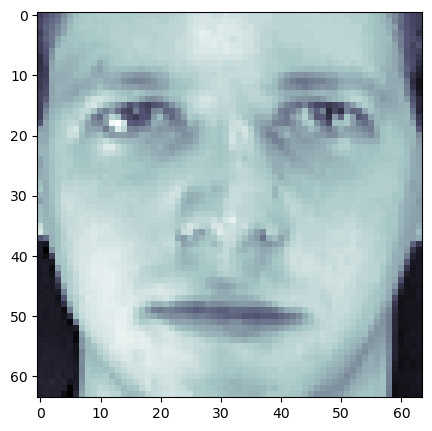

In [54]:
# Point 1.d)
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
img = fig.add_subplot(1,1,1)
img.imshow(faces.images[0], cmap='bone')

## Question 2

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_validation, y_train, y_validation = train_test_split(faces.data,
        faces.target, random_state=0,stratify=faces.target, train_size=0.8)

# On a bien 80% du dataset en train et le reste en test
print(x_train.shape, x_validation.shape)

# On a bien 80% des 10 éléments (donc 8) pour chaque classe (visage)
print(np.unique(np.sort(y_train), return_counts=True))

(320, 4096) (80, 4096)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))


## Question 3

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# expérience de classification avec KNN
def knn_train(train_data, train_expected):
    knn_clf = KNeighborsClassifier(n_neighbors=5)
    knn_clf.fit(train_data, train_expected)
    return knn_clf

# expérience de classification avec une régression logistique
def log_regr_train(train_data, train_expected):
    lr_clf = LogisticRegression()
    lr_clf.fit(train_data, train_expected)
    return lr_clf

# expérience de classification avec SVM
def svm_train(train_data, train_expected):
    svm_clf = svm.SVC()
    svm_clf.fit(train_data, train_expected)
    return svm_clf

In [57]:

def run_train_experiment(train_data, train_expected, test_data, test_expected, show_confusion_matrices=False):
    knn_pred = knn_train(train_data, train_expected).predict(test_data)
    lr_pred = log_regr_train(train_data, train_expected).predict(test_data)
    svm_pred = svm_train(train_data, train_expected).predict(test_data)

    # accuracy de chacun des modèles (knn, logistique, svm)

    if show_confusion_matrices:
        print("KNN accuracy :", accuracy_score(test_expected, knn_pred))
        print("Logistical Regression accuracy :", accuracy_score(test_expected, lr_pred))
        print("SVM accuracy :", accuracy_score(test_expected, svm_pred))

    if show_confusion_matrices:
        fig, axes = plt.subplots(1, 3, figsize=(30, 10))
        ConfusionMatrixDisplay.from_predictions(test_expected, knn_pred, ax=axes[0])  
        ConfusionMatrixDisplay.from_predictions(test_expected, lr_pred, ax=axes[1])
        ConfusionMatrixDisplay.from_predictions(test_expected, svm_pred, ax=axes[2])

    return knn_pred, lr_pred, svm_pred



c:\Users\remia\anaconda3\envs\Labo1\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN accuracy : 0.875
Logistical Regression accuracy : 0.9375
SVM accuracy : 0.95


(array([ 7, 10, 11,  0,  8,  0, 23, 11, 27, 20,  0,  2, 22,  8, 31, 32,  0,
        29, 33,  6, 22, 18,  5, 26, 39, 20, 21,  4, 30, 28, 22, 17, 13, 17,
        19, 39,  0,  9, 38, 23, 22, 34, 36, 30, 35, 27, 17,  4, 36, 15, 38,
         9, 12, 25, 12, 17, 35, 31, 29, 16, 19, 18, 16, 20,  6,  5,  1,  4,
        33, 24, 26, 13, 14, 21, 10, 32, 37,  1, 14, 24]),
 array([ 7, 10, 11, 39,  8, 15, 23, 11, 27, 20,  2,  2,  3,  8, 31, 32,  0,
        29, 33,  6,  2, 18,  5, 26, 39, 28, 21, 34, 30, 28, 22, 17, 13,  3,
        19, 37,  0,  9, 38, 23, 22, 34, 36, 30, 35, 27, 22,  5, 36, 15, 38,
         9, 12,  2, 12, 17, 35, 31, 29, 16, 19, 18, 16, 20,  6,  5,  1,  4,
        33, 24, 26, 13, 14, 38, 10, 32, 37,  1, 14, 24]),
 array([ 7, 10, 11, 39,  8, 15, 23, 11, 27, 20,  0,  2,  3,  8, 31, 32,  0,
        29, 33,  6,  2, 18,  5, 26, 39, 28, 21, 34, 30, 28, 22, 17, 13,  3,
        19, 37,  0,  9, 38, 23, 22, 34, 36, 30, 35, 27, 22, 39, 36, 15, 38,
         9, 12,  2, 12, 17, 35, 31, 29, 16, 19, 

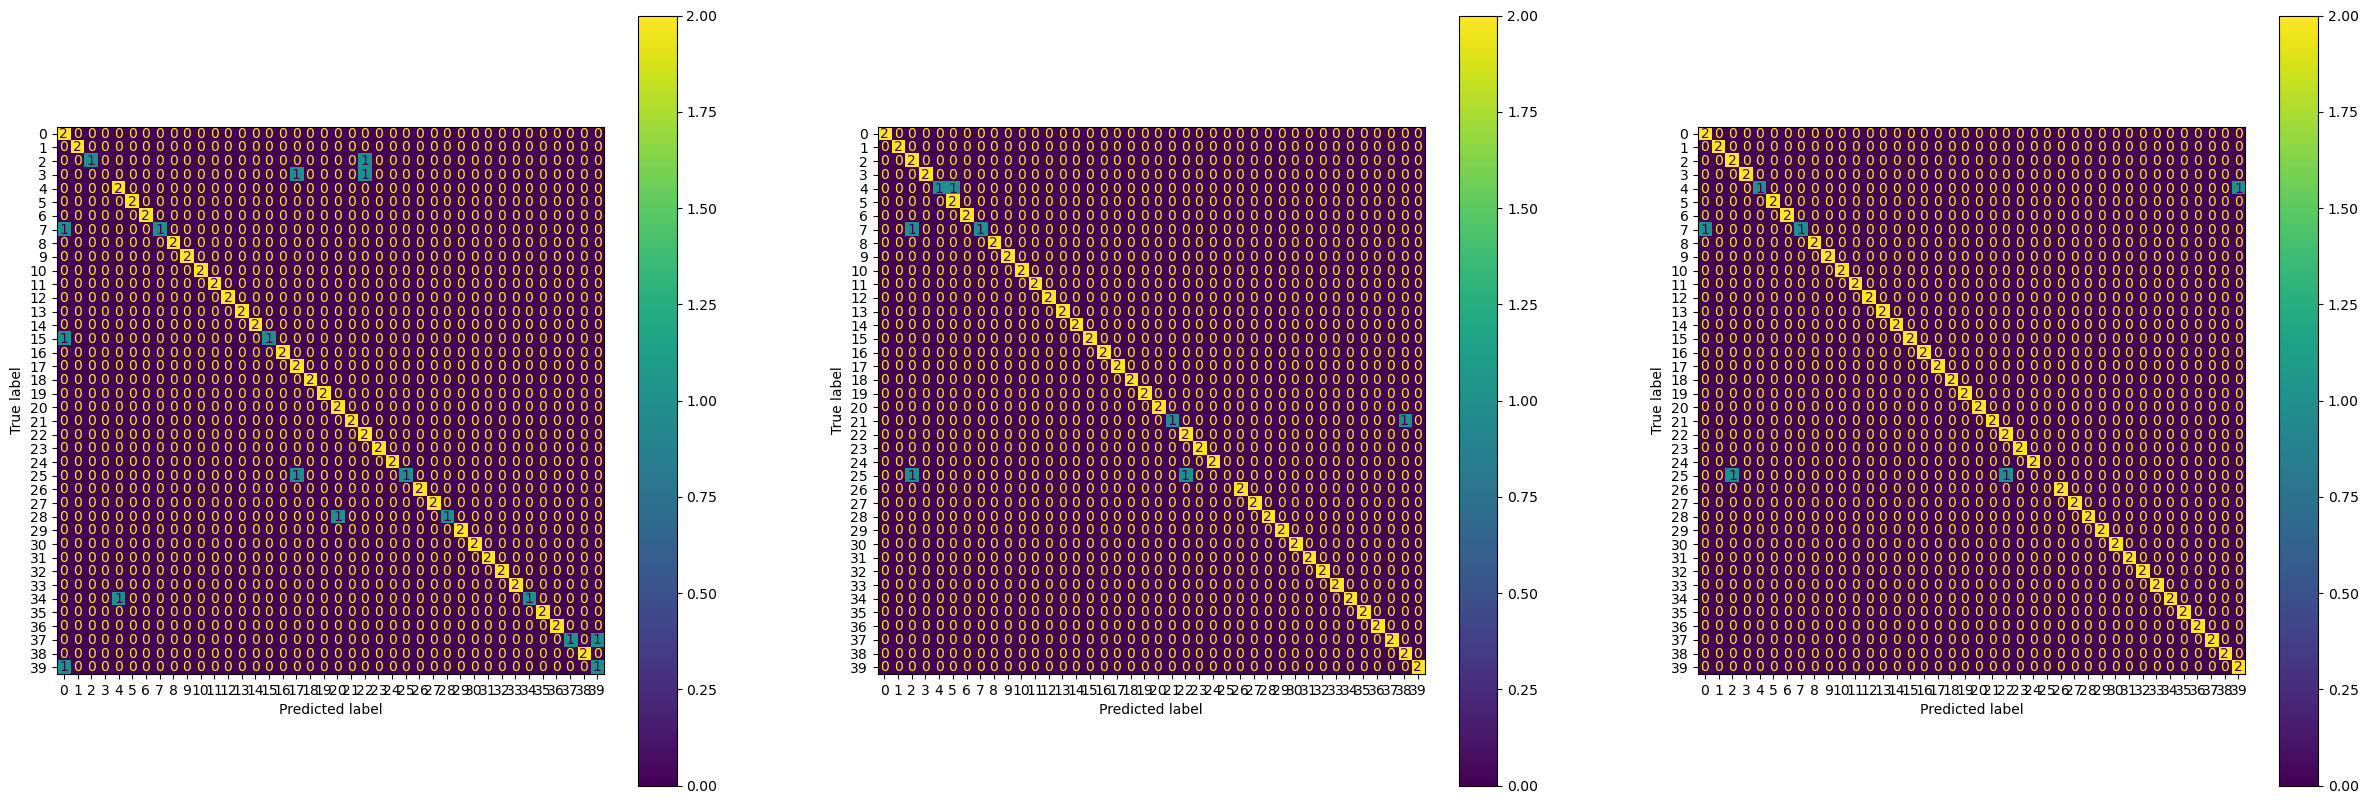

In [58]:
run_train_experiment(x_train, y_train, x_validation, y_validation, show_confusion_matrices=True)

## Question 4 et 5

KNN accuracy : 0.625
Logistical Regression accuracy : 0.925
SVM accuracy : 0.925


(array([ 7, 10, 11, 14,  8, 14, 23, 11, 27, 14,  8,  4, 22,  8, 24, 32, 29,
        29, 33,  5, 14, 29,  5, 26, 39, 28, 21,  4, 20, 28, 14, 17, 13, 14,
        19, 37,  0,  9, 14, 23, 22, 34, 29, 30, 29, 24,  4,  4, 14, 14, 38,
         9, 12, 25, 12, 17, 30, 14, 29, 29, 19, 18, 14, 20, 17,  5,  1,  4,
        33, 24, 29, 13, 14,  4, 10, 32, 37,  8, 14, 24]),
 array([ 7, 10, 11, 39,  8, 15, 23, 11, 27, 20,  2,  2,  3,  8, 31, 32, 39,
        29, 33,  6,  2, 18,  5, 26, 39, 28, 21,  4, 30, 28, 22, 17, 13,  3,
        19, 37,  0,  9, 38, 23, 22, 34, 36, 30, 35, 27, 25, 39, 36, 15, 38,
         9, 12,  2, 12, 17, 35, 31, 29, 16, 19, 18, 16, 20,  6,  5,  1,  4,
        33, 24, 26, 13, 14, 38, 10, 32, 37,  1, 14, 24]),
 array([ 7, 10, 11, 39,  8, 15, 23, 11, 27, 20,  3,  2, 20,  8, 31, 32,  0,
        29, 33,  6,  2, 18,  5, 26, 39, 28, 21, 34, 30, 28, 22, 17, 13,  3,
        19, 37,  0,  9, 38, 23, 22, 34, 36, 30, 35, 27, 25, 39, 36, 15, 38,
         9, 12,  2, 12, 17, 35, 31, 29, 16, 19, 

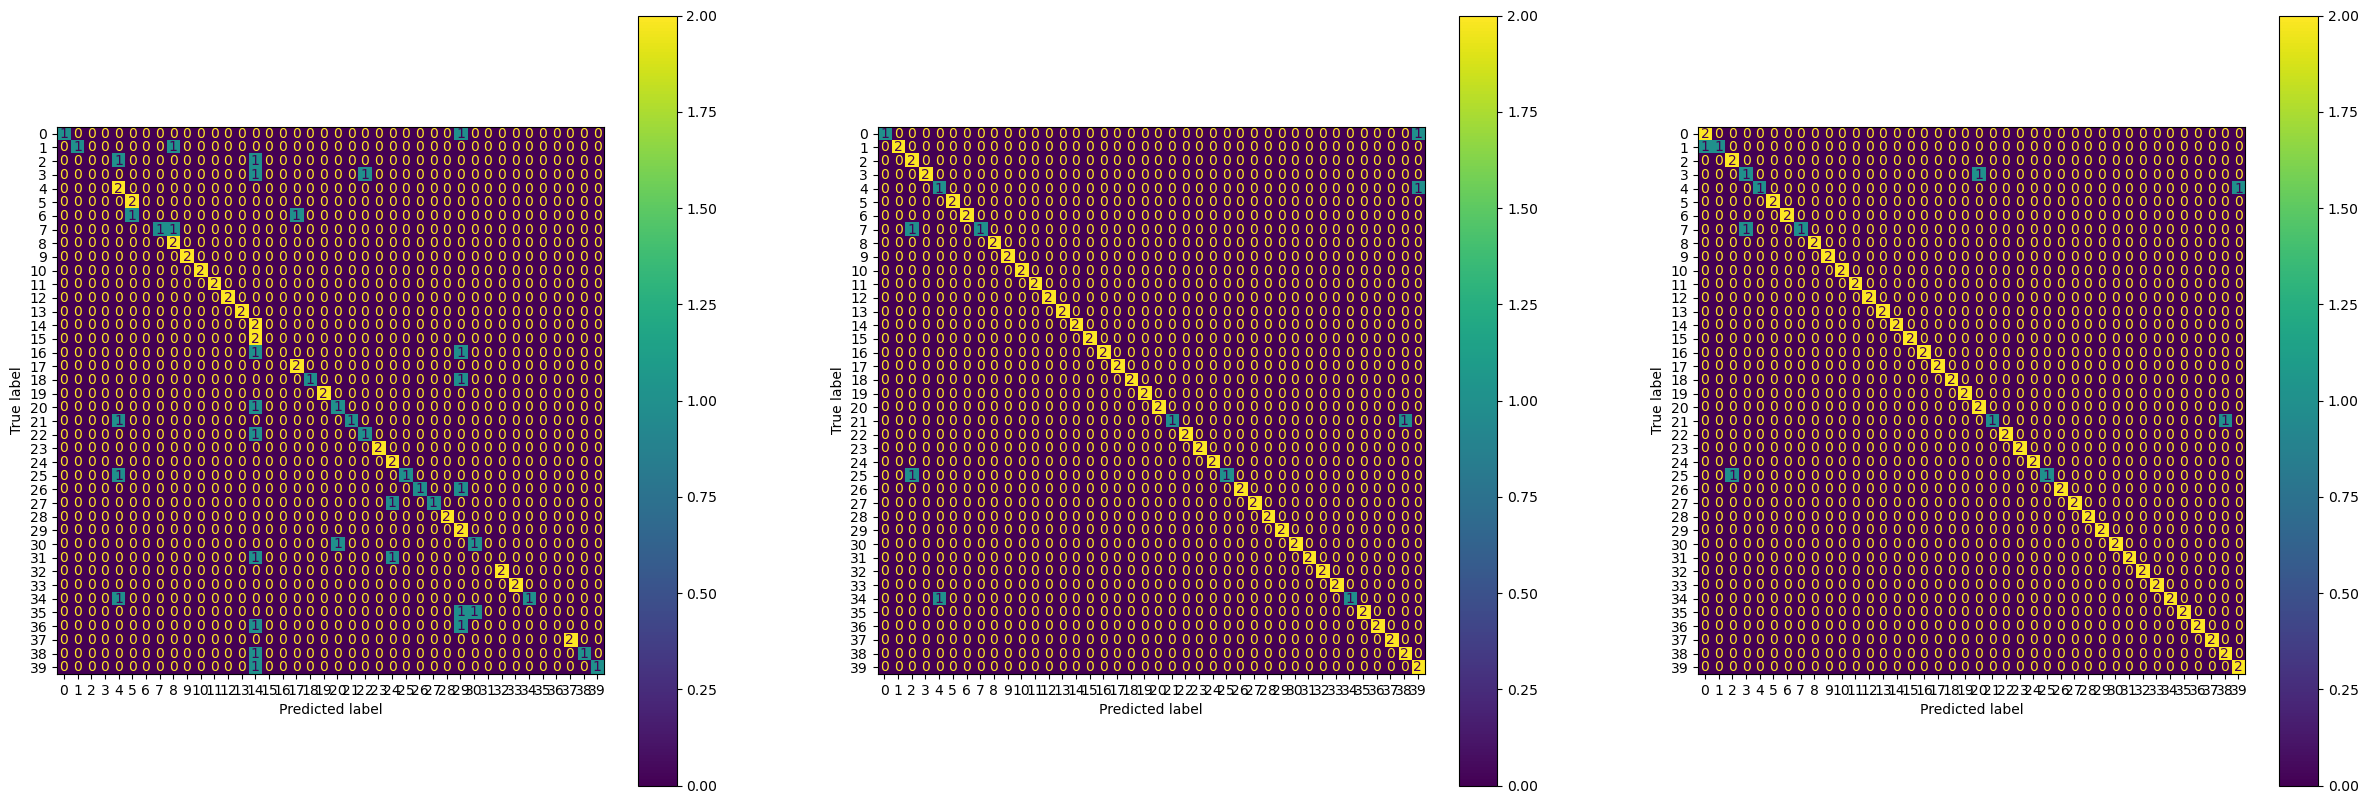

In [59]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(x_train)
X_train_pca = pca.transform(x_train)
X_test_pca = pca.transform(x_validation)

run_train_experiment(X_train_pca, y_train, X_test_pca, y_validation, show_confusion_matrices=True)

On obtient de moins bons résultats que sans utiliser de composantes !

Pour utiliser l'ACP, il n'y a pas eu besoin de normaliser les données car les valeurs des pixels sont déjà comprises entre 0 et 1. Il n'as pas été nécessaire non plus de centrer les données car l'ACP le fait déjà.

## Question 6

In [60]:
from sklearn import decomposition
import pandas as pnd

# création d'un dataframe pour stocker les résultats
results = pnd.DataFrame(columns=["Components", "KNN accuracy", "Log Reg accuracy", "SVM accuracy"])

for components_count in range(10, 300, 2): # nous pouvons ajuster cette plage pour des raisons de performance
    components = decomposition.PCA(n_components=components_count, whiten=True)
    # ajustement du modèle PCA
    components.fit(x_train)
    transformed_x_train = components.transform(x_train)
    transformed_x_test = components.transform(x_validation)

    # exécution de l'expérience avec les 3 modèles
    knn_pred, lr_pred, svm_pred = run_train_experiment(transformed_x_train, y_train, transformed_x_test, y_validation)

    # calcul de l'accuracy pour chaque modèle
    knn_accuracy = accuracy_score(y_validation, knn_pred)
    lr_accuracy = accuracy_score(y_validation, lr_pred)
    svm_accuracy = accuracy_score(y_validation, svm_pred)

    # stockage des résultats
    results.loc[len(results)] = [components_count, knn_accuracy, lr_accuracy, svm_accuracy]

In [61]:
print(results.sort_values("KNN accuracy", ascending=False).head())
print(results.sort_values("Log Reg accuracy", ascending=False).head())
print(results.sort_values("SVM accuracy", ascending=False).head())

    Components  KNN accuracy  Log Reg accuracy  SVM accuracy
5         20.0        0.8875            0.9500        0.9375
6         22.0        0.8875            0.9250        0.9375
8         26.0        0.8875            0.9500        0.9375
9         28.0        0.8875            0.9500        0.9375
20        50.0        0.8750            0.9625        0.9625
    Components  KNN accuracy  Log Reg accuracy  SVM accuracy
19        48.0        0.8750            0.9750        0.9625
18        46.0        0.8750            0.9750        0.9750
21        52.0        0.8375            0.9625        0.9625
20        50.0        0.8750            0.9625        0.9625
17        44.0        0.8375            0.9625        0.9750
     Components  KNN accuracy  Log Reg accuracy  SVM accuracy
18         46.0        0.8750            0.9750        0.9750
17         44.0        0.8375            0.9625        0.9750
15         40.0        0.8250            0.9625        0.9750
144       298.0     

Avec 48 composantes, on obtient une accuracy de 0.975 pour le modèle de regression logsitique et le modèle SVM.
Avec 26 composantes, on obtient une accuracy de 0.9 pour KNN (la meilleur pour ce modèle)

## Question 7

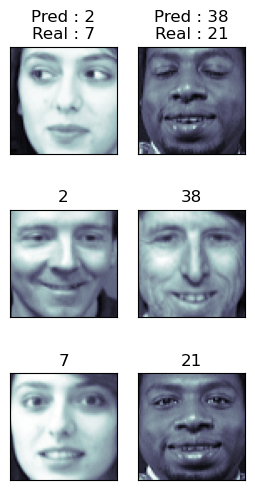

In [62]:
import numpy as np

optimal_components = decomposition.PCA(n_components=48, whiten=True)
optimal_components.fit(x_train)
training_data = optimal_components.transform(x_train)
testing_data = optimal_components.transform(x_validation)
svm_model = svm_train(training_data, y_train)

predictions = svm_model.predict(testing_data)

wrong = y_validation != predictions

fig = plt.figure(figsize=(8,6))

for i, j in enumerate(np.where(wrong)[0]):
    if i == 5:
        break
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_validation[j].reshape(faces.images[0].shape), cmap=plt.cm.bone)

    wrong_prediction = svm_model.predict(testing_data[j, np.newaxis])[0]
    ax.set_title(f'Pred : {wrong_prediction}\nReal : {y_validation[j]}')

    expected_person_id = y_validation[j]

    ax = fig.add_subplot(3, 5, i + 6, xticks=[], yticks=[])
    ax.imshow(faces.images[wrong_prediction * 10], cmap="bone")
    ax.set_title(f'{wrong_prediction}')

    ax = fig.add_subplot(3, 5, i + 11, xticks=[], yticks=[])
    ax.imshow(faces.images[expected_person_id * 10], cmap="bone")
    ax.set_title(f'{expected_person_id}')


plt.show()

On note que si on ajuste juste un peu le modèle, souvent les erreurs ce font avec la personne numéro 2. Cela est peut être du à la qualité des images de cette personne ou a son visage plutôt commun.

Pour l'erreur entre la personne 21 et 38, nous ne comprenons pas pourquoi cette erreur est faite. Peut être que le passage à l'ACP a fait perdre des informations importantes pour la différenciation de ces deux personnes.

## Question 8

In [63]:
from scipy import stats
import keras
from keras import layers
from sklearn.model_selection import KFold

# création des tableaux de resultats contenant les accuracies avec et sans pca
pca_accuracies = []
no_pca_accuracies = []

# creations de folds pour la validation croisée
N_FOLDS = 5

keras.utils.set_random_seed(123)
kf = KFold(n_splits=N_FOLDS, shuffle=True)

# on itère sur les folds
folds = kf.split(x_train)

for fold in folds:
    train_indices = fold[0]
    test_indices = fold[1]

    training_data = x_train[train_indices]
    y_training = y_train[train_indices]

    testing_data = x_train[test_indices]
    y_testing = y_train[test_indices]

    optimal_components = decomposition.PCA(n_components=48, whiten=True)
    optimal_components.fit(training_data)
    pca_training_data = optimal_components.transform(training_data)
    pca_testing_data = optimal_components.transform(testing_data)

    # entrainement des modèles
    svm_model_with_pca = svm_train(pca_training_data, y_training)
    no_pca_svm_model = svm_train(training_data, y_training)

    # résultats avec et sans pca
    pca_predictions = svm_model_with_pca.predict(pca_testing_data)
    print("PCA Accuracy : ", accuracy_score(y_testing, pca_predictions))
    pca_accuracies.append(accuracy_score(y_testing, pca_predictions))

    
    no_pca_predictions = no_pca_svm_model.predict(testing_data)
    print("No PCA Accuracy : ", accuracy_score(y_testing, no_pca_predictions))
    no_pca_accuracies.append(accuracy_score(y_testing, no_pca_predictions))
    


PCA Accuracy :  0.90625
No PCA Accuracy :  0.84375
PCA Accuracy :  0.9375
No PCA Accuracy :  0.84375
PCA Accuracy :  0.921875
No PCA Accuracy :  0.875
PCA Accuracy :  0.84375
No PCA Accuracy :  0.734375
PCA Accuracy :  0.9375
No PCA Accuracy :  0.875


In [64]:
# test de student pour vérifier si les deux méthodes sont significativement différentes
t_stat, p_value = stats.ttest_rel(pca_accuracies, no_pca_accuracies)
print("T-statistic : ", t_stat)
print("P-value : ", p_value)

T-statistic :  6.531972647421807
P-value :  0.0028378459267344486


On obtient un t-statistique de 6.53 (plus que 5). Donc on peut dire que l'utilisation d'ACP est significativement meilleure que sans ACP.